Top 5 Crimes in Northeast Region (2020):
VEHICLE - STOLEN                                           1042
BURGLARY FROM VEHICLE                                       656
BURGLARY                                                    615
THEFT PLAIN - PETTY ($950 & UNDER)                          613
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     574
Name: Crm Cd Desc, dtype: int64




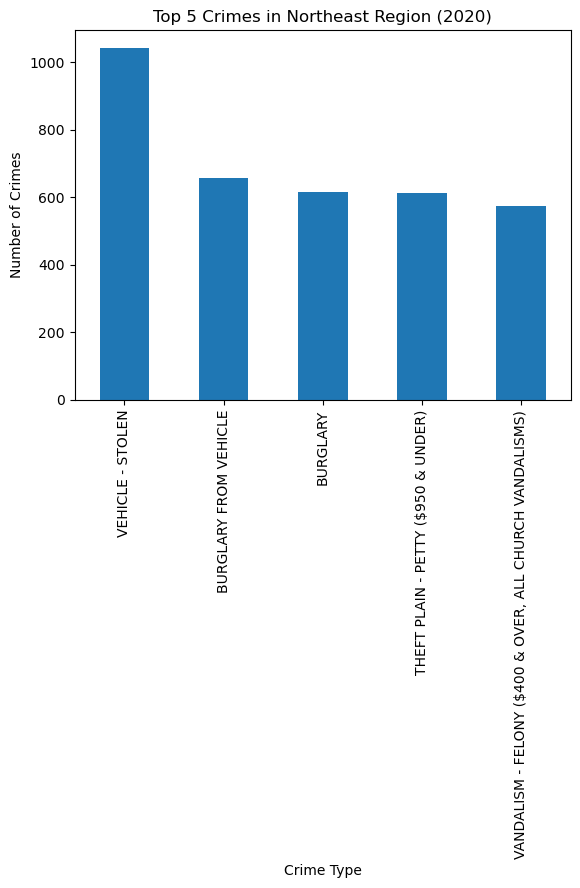

Top 5 Crimes in Northeast Region (2021):
VEHICLE - STOLEN                                           1195
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     648
THEFT PLAIN - PETTY ($950 & UNDER)                          624
BURGLARY FROM VEHICLE                                       615
BATTERY - SIMPLE ASSAULT                                    590
Name: Crm Cd Desc, dtype: int64




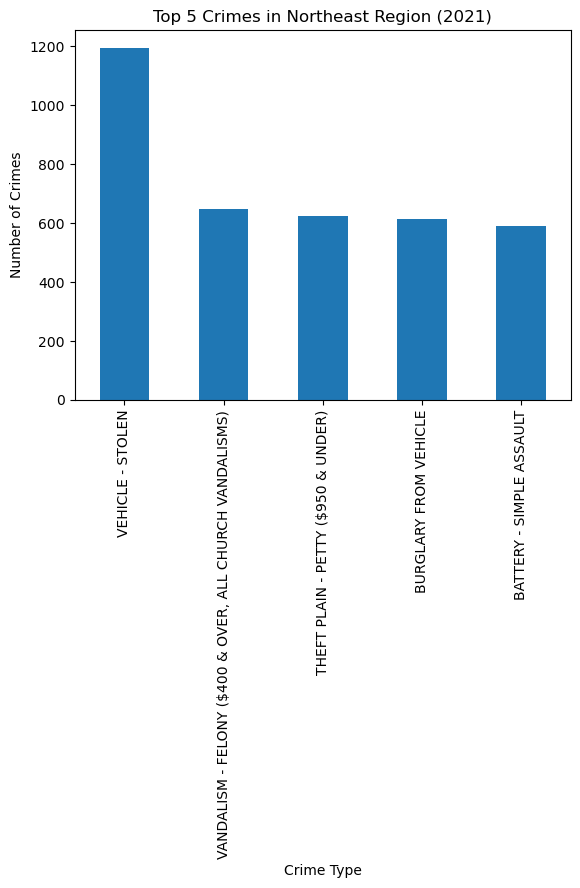

Top 5 Crimes in Northeast Region (2022):
VEHICLE - STOLEN                                       1168
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)     753
BURGLARY FROM VEHICLE                                   718
THEFT OF IDENTITY                                       701
BATTERY - SIMPLE ASSAULT                                691
Name: Crm Cd Desc, dtype: int64




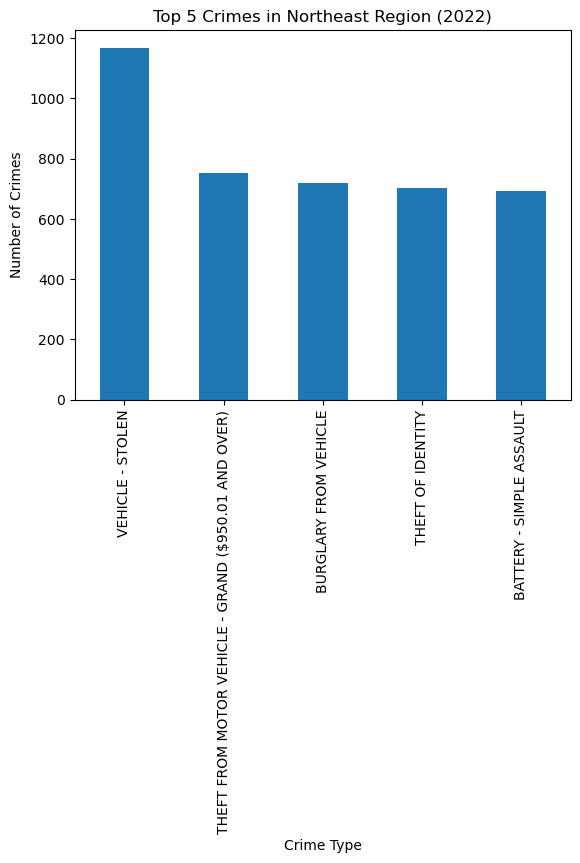

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from the CSV file
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")


# Convert date columns to datetime objects
data["DATE OCC"] = pd.to_datetime(data["DATE OCC"], errors='coerce')
data["Date Rptd"] = pd.to_datetime(data["Date Rptd"], errors='coerce')



# Filter data by region (Northeast Los Angeles)
northeast_data = data[data["AREA NAME"] == "Northeast"]

# Create a DataFrame for each year
years = [2020, 2021, 2022]
data_by_year = {year: northeast_data[northeast_data["DATE OCC"].dt.year == year] for year in years}

# 1. Top 5 crimes in each region (Bar chart)
for year, df in data_by_year.items():
    top_5_crimes = df["Crm Cd Desc"].value_counts().head(5)

    # Print the table for the bar chart
    print(f"Top 5 Crimes in Northeast Region ({year}):")
    print(top_5_crimes)
    print("\n")

    # Plot the bar chart
    plt.figure()
    top_5_crimes.plot(kind='bar')
    plt.title(f"Top 5 Crimes in Northeast Region ({year})")
    plt.xlabel("Crime Type")
    plt.ylabel("Number of Crimes")
    plt.show()




Top 5 Crimes vs Years:
                                                    2020  2021  2022
VEHICLE - STOLEN                                    1042  1195  1168
BURGLARY FROM VEHICLE                                656   615   718
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   574   648   668
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...   351   568   753
BATTERY - SIMPLE ASSAULT                             550   590   691




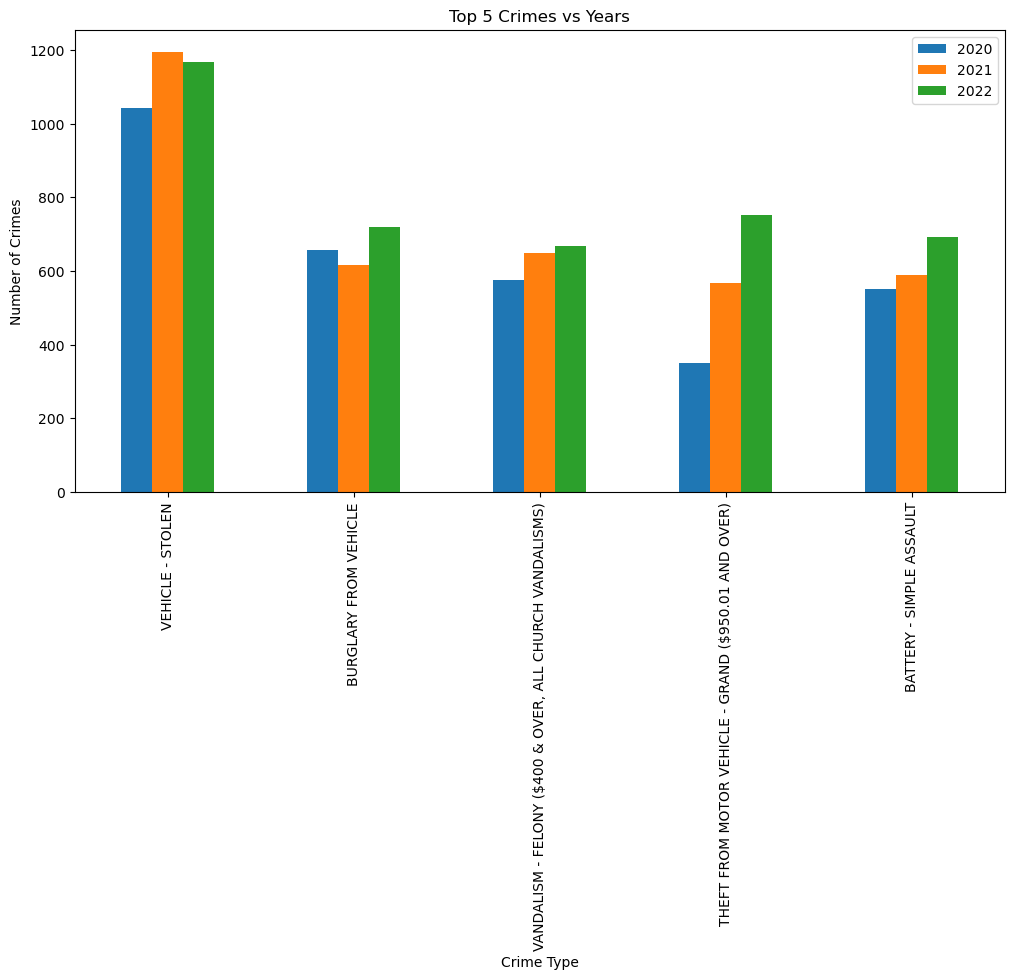

In [20]:
# 2. Top 5 crimes vs years (Bar Chart)
top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

Top 5 Crimes vs Seasons:
                                                    Winter  Spring  Summer  \
VEHICLE - STOLEN                                      1013    1020     849   
BURGLARY FROM VEHICLE                                  703     666     463   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...     539     607     509   
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...     629     506     372   
BATTERY - SIMPLE ASSAULT                               446     595     518   

                                                    Autumn  
VEHICLE - STOLEN                                       840  
BURGLARY FROM VEHICLE                                  423  
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...     447  
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...     529  
BATTERY - SIMPLE ASSAULT                               470  




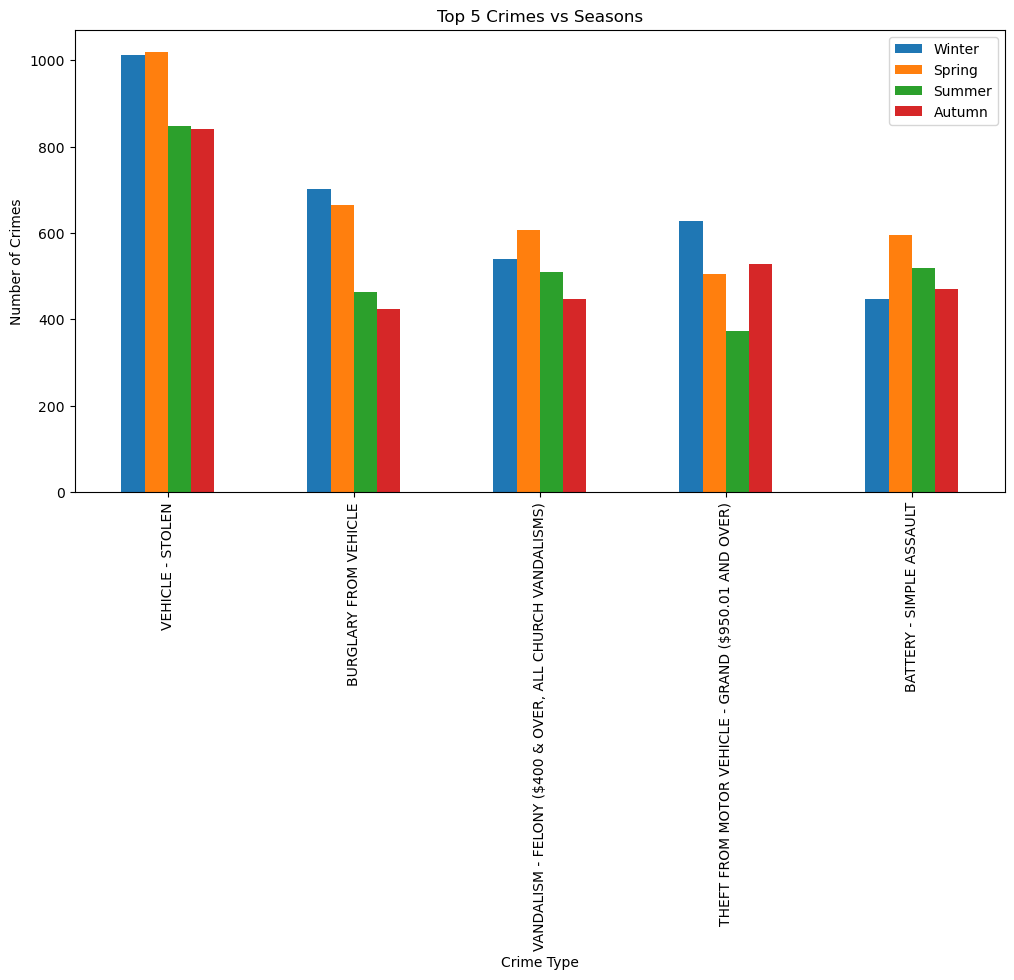

Winter crime counts for 2020:
VEHICLE - STOLEN                                           242
BURGLARY FROM VEHICLE                                      207
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    124
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        101
BATTERY - SIMPLE ASSAULT                                   128
Name: Crm Cd Desc, dtype: int64


Winter crime counts for 2021:
VEHICLE - STOLEN                                           315
BURGLARY FROM VEHICLE                                      157
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    165
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        169
BATTERY - SIMPLE ASSAULT                                   111
Name: Crm Cd Desc, dtype: int64


Winter crime counts for 2022:
VEHICLE - STOLEN                                           291
BURGLARY FROM VEHICLE                                      187
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    165
THEFT FROM MOTOR VEHICL

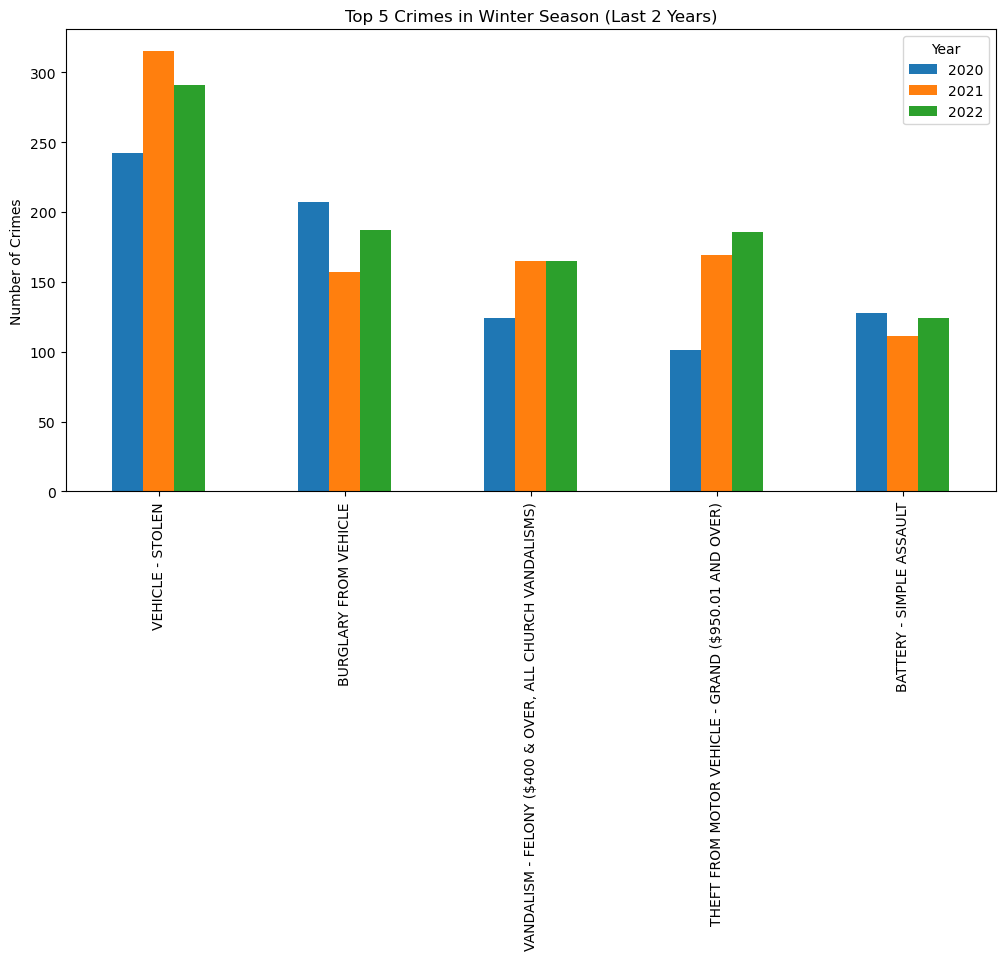

In [21]:
# 2. Top 5 crimes vs seasons (Bar Chart)
seasons = {"Winter": [12, 1, 2], "Spring": [3, 4, 5], "Summer": [6, 7, 8], "Autumn": [9, 10, 11]}
crimes_by_season = {season: northeast_data[northeast_data["DATE OCC"].dt.month.isin(months)] for season, months in seasons.items()}
top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by season
crime_counts_by_season = {}
for season, crimes in crimes_by_season.items():
    crime_counts_by_season[season] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]


# Print the table for the bar chart
print("Top 5 Crimes vs Seasons:")
print(pd.DataFrame(crime_counts_by_season))
print("\n")
# Plot the bar chart
seasonal_crime_counts_df = pd.DataFrame(crime_counts_by_season)
seasonal_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Seasons")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

# Calculate the number of top 5 crimes for Winter season in each year
winter_crime_counts_by_year = {}
for year, df in data_by_year.items():
    winter_data = df[df["DATE OCC"].dt.month.isin(seasons["Winter"])]
    winter_crime_counts_by_year[year] = winter_data["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Display the Winter crime counts for each year
for year, winter_crime_counts in winter_crime_counts_by_year.items():
    print(f"Winter crime counts for {year}:")
    print(winter_crime_counts)
    print("\n")

# Print the table for the bar graph
print("Top 5 Crimes in Winter Season (Last 2 Years):")
print(pd.DataFrame(winter_crime_counts_by_year))
print("\n")

# Create a DataFrame for Winter crime counts for each year
winter_crime_counts_df = pd.DataFrame(winter_crime_counts_by_year)

# Plot the bar graph
ax = winter_crime_counts_df.plot.bar(rot=90, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crimes in Winter Season (Last 2 Years)")
plt.xticks(range(len(top_5_crimes_overall)), top_5_crimes_overall)
plt.legend(title="Year")
plt.show()



Top 3 Crimes vs Month (2020 - 2022):
Crm Cd Desc  BURGLARY FROM VEHICLE  \
DATE OCC                             
2020-01                         80   
2020-02                         73   
2020-03                         74   
2020-04                         74   
2020-05                         57   
2020-06                         59   
2020-07                         50   
2020-08                         25   
2020-09                         44   
2020-10                         29   
2020-11                         37   
2020-12                         54   
2021-01                         59   
2021-02                         42   
2021-03                         56   
2021-04                         42   
2021-05                         55   
2021-06                         43   
2021-07                         50   
2021-08                         48   
2021-09                         43   
2021-10                         55   
2021-11                         66   
2021-12      

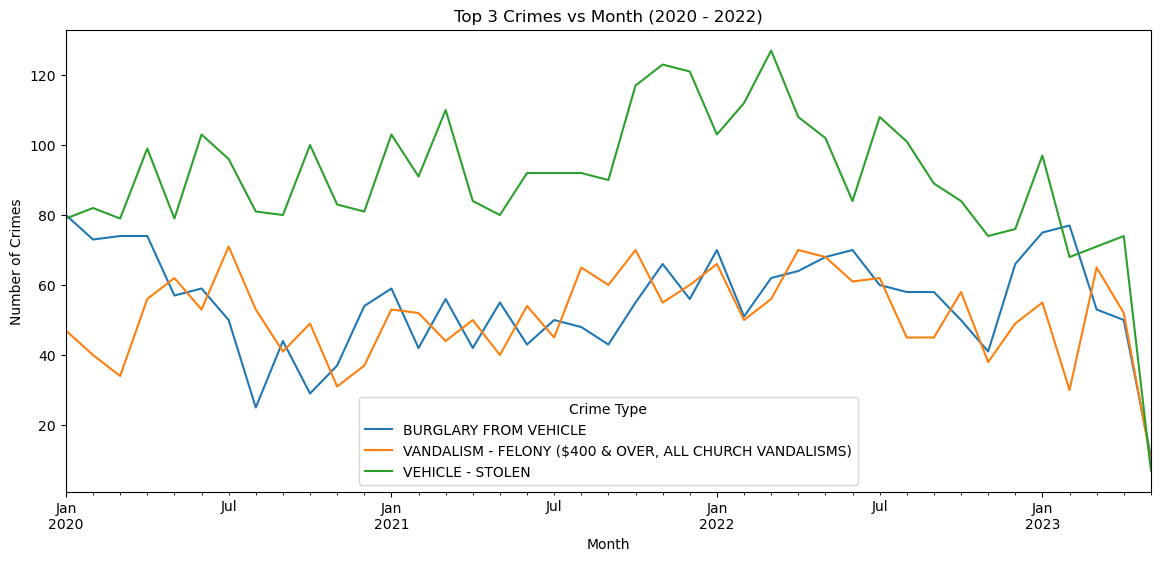

Top 3 Crimes During Socioeconomic Events:
                                                    Pre-COVID  During COVID  \
VEHICLE - STOLEN                                         2689         41736   
BURGLARY FROM VEHICLE                                    2679         23503   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       2142         24452   

                                                    Post-COVID  \
VEHICLE - STOLEN                                         32482   
BURGLARY FROM VEHICLE                                    18450   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       17491   

                                                    During Inflation  \
VEHICLE - STOLEN                                               24688   
BURGLARY FROM VEHICLE                                          14203   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...             13323   

                                                    Post-Inflation  
VEHICLE - STOLEN  

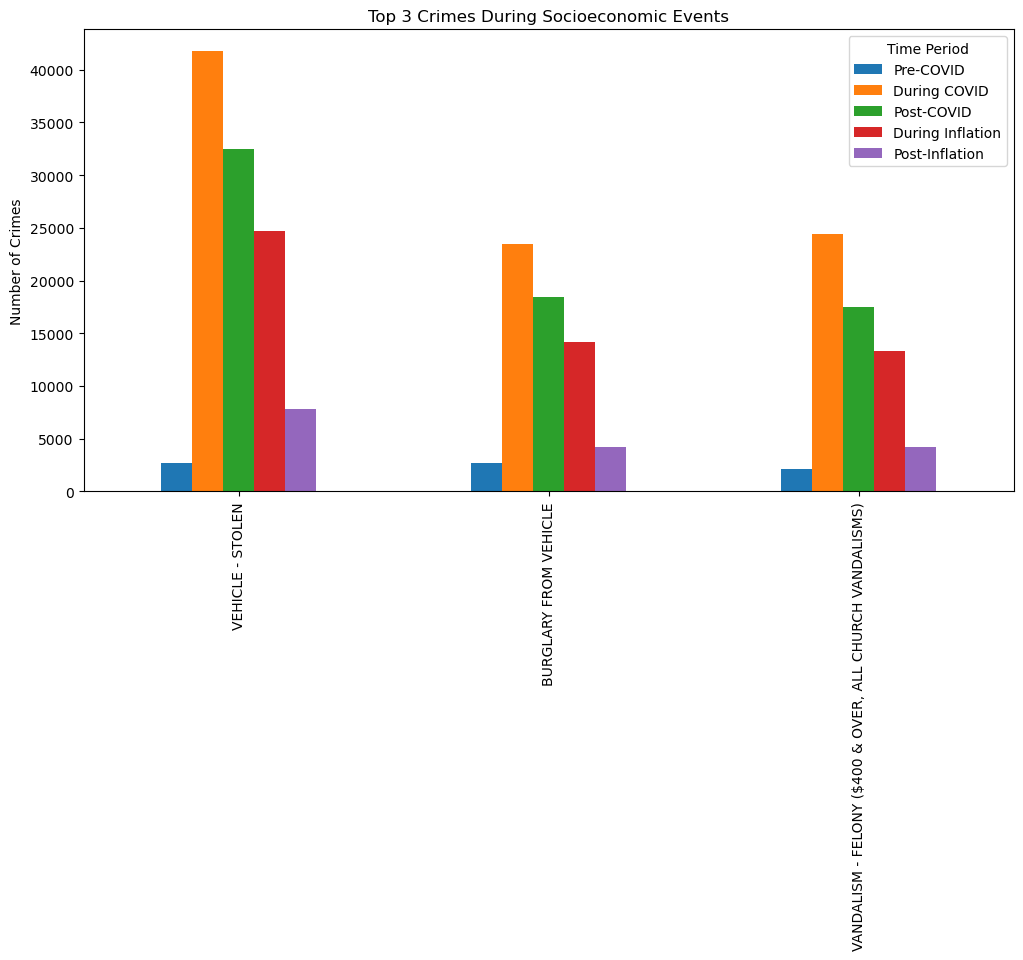

In [22]:
# 3. Top 3 crimes vs month (Line chart)
top_3_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(3).index.tolist()
top_3_crimes_data = northeast_data[northeast_data["Crm Cd Desc"].isin(top_3_crimes_overall)]
crimes_by_month = top_3_crimes_data.groupby([top_3_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Print the table for the line chart
print("Top 3 Crimes vs Month (2020 - 2022):")
print(crimes_by_month)
print("\n")

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 3 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.show()


top_3_crimes = top_5_crimes_overall[:3]

pre_covid_period = (data["DATE OCC"] < "2020-03-01")
during_covid_period = (data["DATE OCC"] >= "2020-03-01") & (data["DATE OCC"] <= "2021-12-31")
post_covid_period = (data["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (data["DATE OCC"] >= "2022-01-01") & (data["DATE OCC"] <= "2022-12-31")
post_inflation_period = (data["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = data[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
during_covid_crime_counts = data[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_covid_crime_counts = data[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]

during_inflation_crime_counts = data[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_inflation_crime_counts = data[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 3 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=90, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 3 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_3_crimes)), top_3_crimes)
plt.legend(title="Time Period")
plt.show()